# Single neuron dynamics

# note: run this example with Python3 kernel

## libs and path

In [1]:
fileName = 'eg_single-cell' 

In [2]:
try:
    import pyNN.spiNNaker as sim
except ModuleNotFoundError:
    import pyNN.brian2 as sim
    
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
import pandas as pd
import seaborn as sns
import time
import datetime
import json
import warnings
warnings.filterwarnings('ignore')
import python_utils as pu

savePath = f'../outputs/' # remember to create the folder if not already present (mkdir ./notebooks/outputs)
dt_string = datetime.datetime.today().isoformat() # ISO8601 ! :-)
tag = dt_string 
saveName = f'{savePath}{fileName}-{tag}'
print(saveName)
PARS={}


WARNING    /home/jovyan/CNT-2025/notebooks/intro/python_utils.py:25: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
 [py.warnings]


../outputs/eg_single-cell-2025-12-01T11:07:29.517055


WARNING    /opt/conda/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=999865) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
 [py.warnings]


Note: you may need to restart the kernel to use updated packages.


## sim setup

In [4]:
PARS['dt']=1 #ms
PARS['min_delay']=1 #ms
PARS['max_delay']=100 #ms
PARS['simtime']=800 #ms

sim.setup(
        timestep=PARS['dt'],
        min_delay=PARS['min_delay'],
        max_delay=PARS['max_delay'])

simtime = PARS['simtime']

## network design

In [5]:
MODEL=sim.IF_cond_exp
N_CELLS = 1

netPars={'v_rest': -65.0, 
      'v_thresh': -37.0, 
      'v_reset': -80.0,
      'cm': 1.0, 
      'tau_m': 20.0, 
      'tau_refrac': 0.1, 
      'tau_syn_E': 50.0, 
      'tau_syn_I': 5.0, 
      'e_rev_E': 0.0, 
      'e_rev_I': -70.0, 
      'i_offset': 0.0}

cell0 = sim.Population(N_CELLS, 
                      MODEL, 
                      cellparams=netPars,
                      label='cell0')

cell0.record(['v', 'gsyn_exc', 'gsyn_inh', 'spikes'])


WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/common/populations.py:680: DeprecationWarning: Passing celltype class and parameters separately is deprecated. Please instantiate the celltype with the parameters before passing to the Population
  warnings.warn(
 [py.warnings]


## input design

In [6]:
# not implemented in sPyNNaker
PARS['AC-start']=100 # ms
PARS['AC-stop']=400 # ms
PARS['AC-amplitude']=10 # nA
PARS['AC-frequency']=10 # Hz


pulse = sim.ACSource(start=PARS['AC-start'],
                     stop=PARS['AC-stop'],
                     amplitude=PARS['AC-amplitude'],
                     frequency=PARS['AC-frequency']
                     )

pulse.inject_into(cell0)
pulse.record()

###################
pulse2 = sim.StepCurrentSource(times=[600,610],
                              amplitudes=[10,0,])
pulse2.inject_into(cell0)
pulse2.record()


# simulation run

In [7]:
tic = time.time()
sim.run(PARS['simtime'])
toc = time.time() - tic
print(f'simulation time: {toc} [s]')


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]
WARNING    Removing unsupported flag '-w' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-O3' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-ffast-math' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-fno-finite-math-only' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-std=c++11' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed: Permission denied (CompileError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note th

simulation time: 1.180711030960083 [s]


# save results

In [8]:
for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
    cell0.write_data(f'{saveName}-{recording}.pkl')

WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]
WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]
WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]
WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]


In [9]:
cell0.get_data()

WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]


Block with [<neo.core.segment.Segment object at 0x73033c6b62c0>] segments
name: 'cell0'
description: 'Population "cell0"\n    Structure   : Line\n    Local cells : 1\n    Cell type   : IF_cond_exp\n    ID range    : 0-0\n    First cell on this node:\n      ID: 0\n      {}'
annotations: {'size': 1,
  'first_index': 0,
  'last_index': 1,
  'first_id': 0,
  'last_id': 0,
  'label': 'cell0',
  'simulator': 'Brian2',
  'dt': 1.0,
  'mpi_processes': 1}
rec_datetime: datetime.datetime(2025, 12, 1, 11, 7, 31, 942128)
# segments (N=[<neo.core.segment.Segment object at 0x73033c6b62c0>])
0: Segment with [<AnalogSignal(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [

In [10]:
v0=cell0.get_data(variables=['v']).segments[0].analogsignals[0]
ge0=cell0.get_data(variables=['gsyn_exc']).segments[0].analogsignals[0]
gi0=cell0.get_data(variables=['gsyn_inh']).segments[0].analogsignals[0]
spikes0=cell0.get_data(variables=['spikes']).segments[0].spiketrains[0]
i=pulse.get_data()
stepPulse=pulse2.get_data()


WARNING    /opt/conda/lib/python3.13/site-packages/pyNN/brian2/recording.py:77: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  mask = np.in1d(id_array, requested_ids)
 [py.warnings]


In [11]:
PARS['v-mean']=v0.magnitude.mean()
PARS['gsyn_exc-mean']=ge0.magnitude.mean()
PARS['gsyn_inh-mean']=gi0.magnitude.mean()
PARS['fr-mean']=cell0.get_spike_counts()

In [12]:
JSON=dict(**PARS,**netPars)
with open(f'{saveName}.json', 'w') as json_file:
    json.dump(JSON, json_file)
JSON

{'dt': 1,
 'min_delay': 1,
 'max_delay': 100,
 'simtime': 800,
 'AC-start': 100,
 'AC-stop': 400,
 'AC-amplitude': 10,
 'AC-frequency': 10,
 'v-mean': np.float64(-83.21731985242472),
 'gsyn_exc-mean': np.float64(0.0),
 'gsyn_inh-mean': np.float64(0.0),
 'fr-mean': {0: 18},
 'v_rest': -65.0,
 'v_thresh': -37.0,
 'v_reset': -80.0,
 'cm': 1.0,
 'tau_m': 20.0,
 'tau_refrac': 0.1,
 'tau_syn_E': 50.0,
 'tau_syn_I': 5.0,
 'e_rev_E': 0.0,
 'e_rev_I': -70.0,
 'i_offset': 0.0}

cell0 spikes: {0: 18}


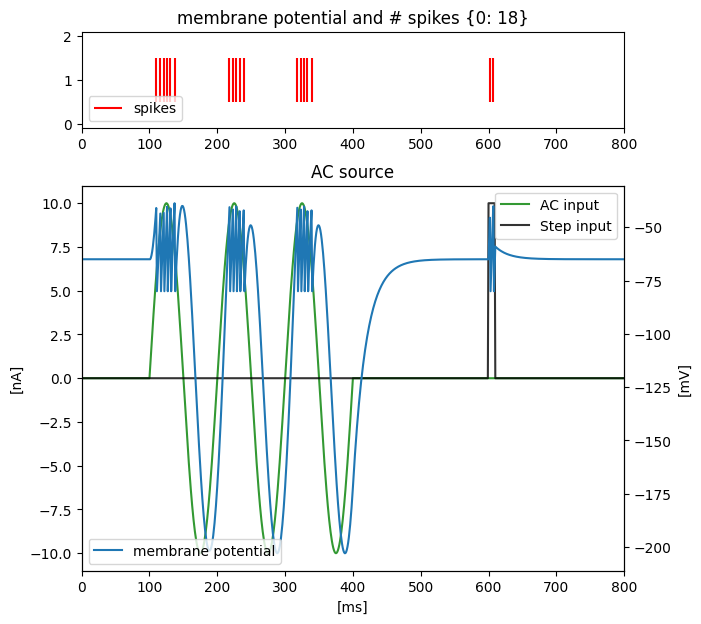

In [13]:
print(f'cell0 spikes: {cell0.get_spike_counts()}')

fig, ax = plt.subplots(1,1, figsize=(7,5))
#fig.tight_layout(pad=5)

ax.plot(i, 'green', alpha=0.8, label='AC input')
ax.plot(stepPulse, 'k', alpha=0.8, label='Step input')

ax1=ax.twinx()
ax1.plot(v0, label='membrane potential')

#ax1.axhline(y=cell0[0].v_thresh, color='k')
ax2=ax1.inset_axes([0,1.15,1,0.25])
ax2.set_xlim(0, simtime)
ax2.eventplot(np.array(list(spikes0)).T, color='r', alpha=1, label='spikes')

ax.set_ylabel('[nA]')
ax.set_title('AC source')
ax1.set_title(f'membrane potential and # spikes {cell0.get_spike_counts()}')

ax1.set_ylabel('[mV]')

ax.set_xlim(0, simtime) 
ax.set_xlabel('[ms]') 
#ax1.set_yticklabels(' ')

ax1.legend(loc='lower left') 
ax2.legend(loc='lower left') 
ax.legend(loc='upper right') 

fig.savefig(f'{saveName}.jpeg', dpi=70, bbox_inches='tight', facecolor='white')
